In [1]:
!pip install numpy matplotlib scikit-learn tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
from google.colab import files

uploaded = files.upload()  # Upload cat.npy, fish.npy, etc.

Saving cat.npy to cat.npy
Saving fish.npy to fish.npy
Saving ice_cream.npy to ice_cream.npy
Saving swan.npy to swan.npy
Saving tree.npy to tree.npy


In [5]:
classes = ["cat", "fish", "ice_cream", "swan", "tree"]
class_map = {name: i for i, name in enumerate(classes)}

X = []
y = []

for cls in classes:
    data = np.load(f"{cls}.npy")
    data = data[:3000]  # Use 3k samples per class
    labels = [class_map[cls]] * len(data)
    X.append(data)
    y.extend(labels)

X = np.concatenate(X, axis=0)
y = np.array(y)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (15000, 784)
Shape of y: (15000,)


In [9]:
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y_cat = to_categorical(y, num_classes=len(classes))

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,389 (876.52 KB)

 Trainable params: 224,389 (876.52 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.7143 - loss: 0.7850 - val_accuracy: 0.9150 - val_loss: 0.2668
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9069 - loss: 0.2790 - val_accuracy: 0.9273 - val_loss: 0.2252
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9304 - loss: 0.2108 - val_accuracy: 0.9353 - val_loss: 0.1957
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9407 - loss: 0.1823 - val_accuracy: 0.9447 - val_loss: 0.1741
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9460 - loss: 0.1600 - val_accuracy: 0.9397 - val_loss: 0.1742
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9591 - loss: 0.1258 - val_accuracy: 0.9477 - val_loss: 0.1607
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9603 - loss: 0.1192 - val_accuracy: 0.9500 - val_loss: 0.1557
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9696 - loss: 0.0915 - 

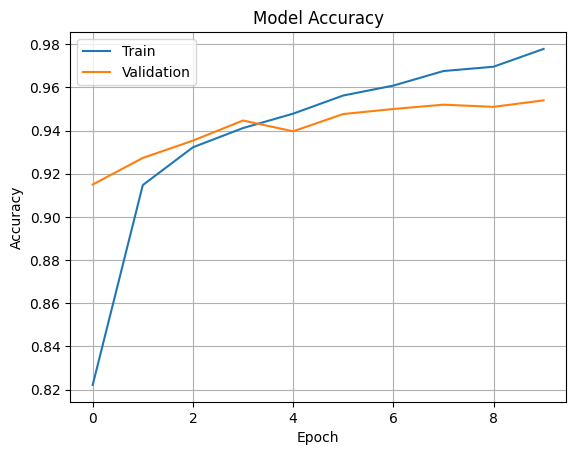

In [12]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [14]:
os.makedirs("../model", exist_ok=True)
model.save("../model/sketch_model.h5")
print("Model saved to model/sketch_model.h5")

Model saved to model/sketch_model.h5
